In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
import numpy as np
import time

In [14]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [15]:
import numpy as np

val = np.random.rand(8000*8000)
shape = (8000, 8000)

row_major = val.reshape(shape, order="C")   # view (no copy)
col_major = val.reshape(shape, order="F")   # view (no copy)

In [16]:
#row_major = np.array(val).reshape(shape, order='C')
#col_major = np.array(val).reshape(shape, order='F')

In [17]:
import numpy as np

l = []
for _ in range(30):
    vals = np.random.rand(8000,8000)
    row_major = np.ascontiguousarray(vals)
    col_major = np.asfortranarray(vals)
    r_ini = time.time()
    row_major.sum()
    r_end = time.time()
    c_ini = time.time()
    col_major.sum()
    c_end = time.time()
    l.append({'rm': r_end - r_ini, 'cm': c_end - c_ini})

df = pd.DataFrame(l)

In [18]:
row_major.flags['C_CONTIGUOUS']

True

In [19]:
col_major.flags['C_CONTIGUOUS']

False

In [20]:
col_major.flags['F_CONTIGUOUS']


True

(array([ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.   , 0.015, 0.03 , 0.045, 0.06 , 0.075, 0.09 , 0.105, 0.12 ,
        0.135, 0.15 ]),
 <BarContainer object of 10 artists>)

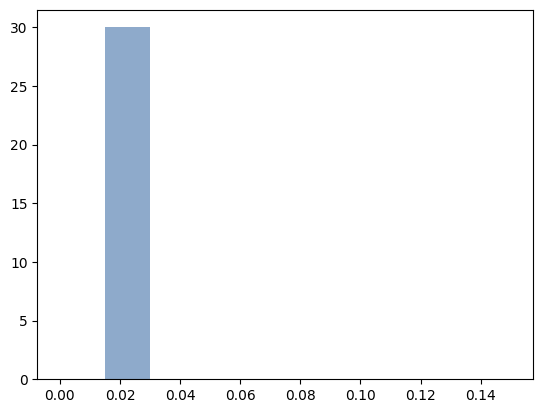

In [21]:
plt.hist(df['rm'], alpha=0.5, label='Row Major', range=(0,0.15), color='pink')
plt.hist(df['cm'], alpha=0.5, label='Column Major', range=(0,0.15))

In [22]:
print(df['rm'].describe())
print(df['cm'].describe())

count    30.000000
mean      0.022013
std       0.001441
min       0.020836
25%       0.021221
50%       0.021491
75%       0.022170
max       0.026531
Name: rm, dtype: float64
count    30.000000
mean      0.021867
std       0.001560
min       0.020556
25%       0.021013
50%       0.021402
75%       0.021693
max       0.026920
Name: cm, dtype: float64


In [23]:
df.describe()#.to_markdown()

,rm,cm
count,30.000000,30.000000
mean,0.022013,0.021867
std,0.001441,0.001560
min,0.020836,0.020556
25%,0.021221,0.021013
50%,0.021491,0.021402
75%,0.022170,0.021693
max,0.026531,0.026920


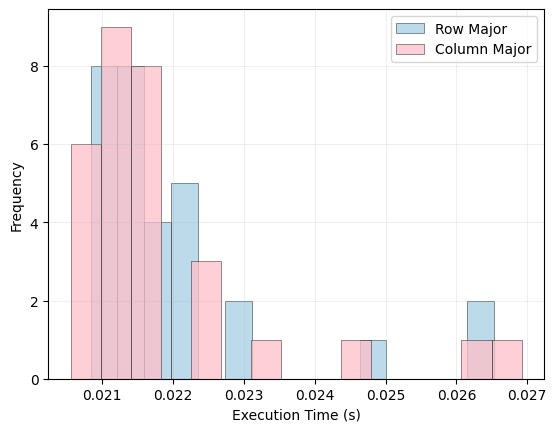

In [24]:
plt.figure()

plt.hist(df['rm'],
         bins=15,
         alpha=0.75,
         label='Row Major',
         color='#A6CEE3',   # pastel blue
         edgecolor='black',
         linewidth=0.4)

plt.hist(df['cm'],
         bins=15,
         alpha=0.75,
         label='Column Major',
         color='pink',   # pastel pink
         edgecolor='black',
         linewidth=0.4)

plt.legend(frameon=True)
plt.xlabel("Execution Time (s)")
plt.ylabel("Frequency")

plt.grid(True, alpha=0.2)

plt.savefig("memorytimingdistrib.png", dpi=300, bbox_inches="tight")
plt.show()


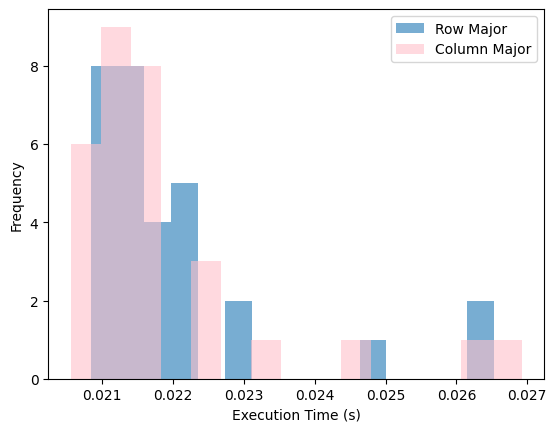

: 

In [ ]:
plt.hist(df['rm'], bins=15, alpha=0.6, label='Row Major')
plt.hist(df['cm'], bins=15, alpha=0.6, label='Column Major', color='pink')
plt.legend()
plt.xlabel("Execution Time (s)")
plt.ylabel("Frequency")
#plt.title("Row vs Column Memory Timing Distribution")
plt.savefig("memorytimingdistrib.png", dpi=300, bbox_inches="tight")
plt.show()
